In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dados = pd.read_csv('movies.csv')
dados.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
dados.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
porcent_null = dados.isna().sum().sum()/dados.size
porcent_null

0.02150060858981047

In [5]:
dados = dados.dropna()
dados.isna().sum().sum()

0

In [6]:
dados.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
dados['budget'] = dados['budget'].astype('int64')
dados['gross'] = dados['gross'].astype('int64')
dados

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [8]:
dados['yearcorrect'] = dados['released'].str.extract(pat = '([0-9]{4})').astype(int)
dados.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [9]:
#top 10 filmes com maiores orçamentos
dados.sort_values(by = ['gross'], inplace = False, ascending = False).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,2015
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,2019


In [10]:
#top 10 filmes com maior nota
dados_top_movies = dados.sort_values(by = 'score' , inplace = False, ascending = False).head(10)
dados_top_movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000,28817291,Castle Rock Entertainment,142.0,1994
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000,1005973645,Warner Bros.,152.0,2008
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000,322161245,Universal Pictures,195.0,1994
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000,213928762,Miramax,154.0,1994
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000,1146030912,New Line Cinema,201.0,2003
5643,Inception,PG-13,Action,2010,"July 16, 2010 (United States)",8.8,2100000.0,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,160000000,836836967,Warner Bros.,148.0,2010
2445,Forrest Gump,PG-13,Drama,1994,"July 6, 1994 (United States)",8.8,1900000.0,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000,678226133,Paramount Pictures,142.0,1994
3444,Fight Club,R,Drama,1999,"October 15, 1999 (United States)",8.8,1900000.0,David Fincher,Chuck Palahniuk,Brad Pitt,Germany,63000000,101209702,Fox 2000 Pictures,139.0,1999
3845,The Lord of the Rings: The Fellowship of the Ring,PG-13,Action,2001,"December 19, 2001 (United States)",8.8,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,93000000,897690072,New Line Cinema,178.0,2001
3443,The Matrix,R,Action,1999,"March 31, 1999 (United States)",8.7,1700000.0,Lana Wachowski,Lilly Wachowski,Keanu Reeves,United States,63000000,466364845,Warner Bros.,136.0,1999


Text(0.5, 1.0, 'Budget Boxplot')

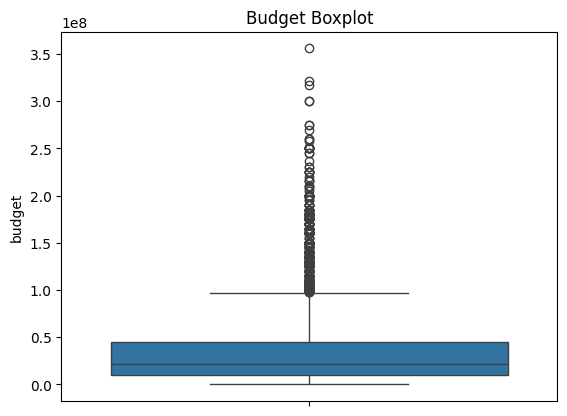

In [11]:
plt.subplot()
sns.boxplot(dados['budget']).set_title('Budget Boxplot')

Text(0.5, 1.0, 'Gross Boxplot')

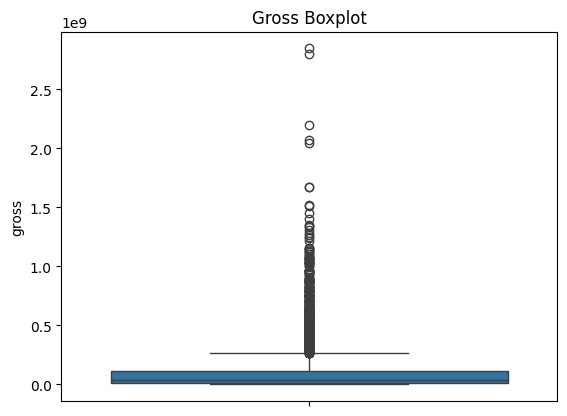

In [12]:
sns.boxplot(dados['gross']).set_title('Gross Boxplot')

In [35]:
genre = dados["genre"].value_counts()
most_pop = (genre / sum(genre) * 100).apply(lambda x: f"{x:0.2f} %")
most_pop

genre
Comedy       27.60 %
Action       26.10 %
Drama        15.92 %
Crime         7.36 %
Adventure     6.03 %
Biography     5.74 %
Animation     5.11 %
Horror        4.63 %
Fantasy       0.76 %
Mystery       0.31 %
Thriller      0.13 %
Sci-Fi        0.11 %
Romance       0.09 %
Family        0.07 %
Western       0.04 %
Name: count, dtype: object

Text(0.5, 1.0, 'Gêneros mais consumidos')

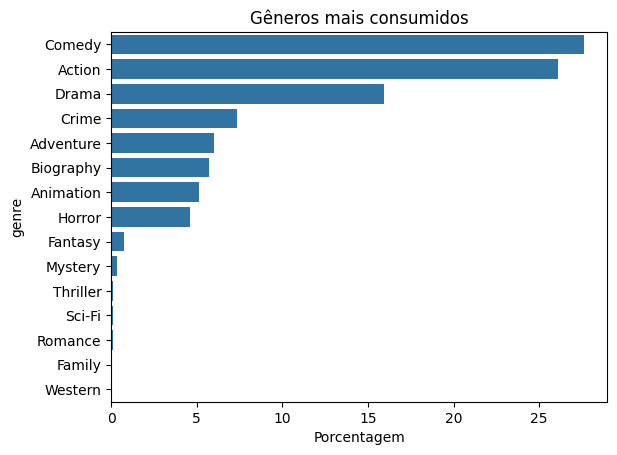

In [37]:
sns.barplot( x = genre / sum(genre) * 100, y = genre.index)
plt.xlabel('Porcentagem')
plt.title('Gêneros mais consumidos')

In [68]:
top_diretores = dados['director'].value_counts().nlargest(5)
top_diretores

director
Woody Allen          33
Clint Eastwood       31
Steven Spielberg     27
Steven Soderbergh    23
Ridley Scott         23
Name: count, dtype: int64

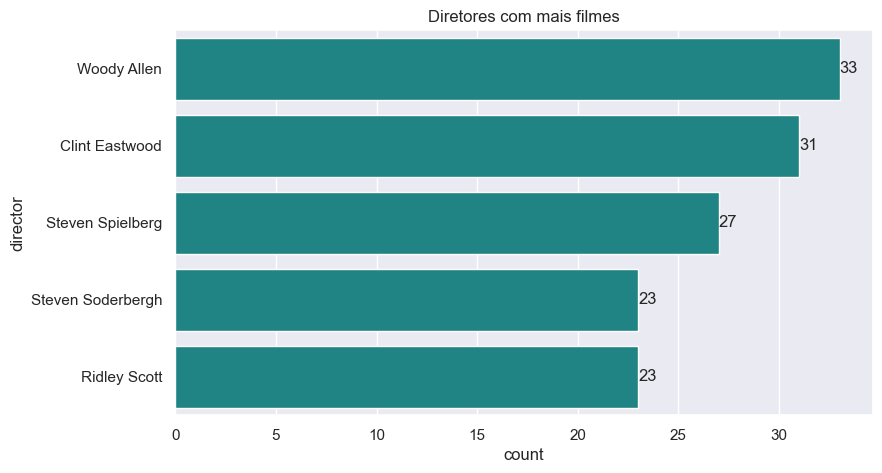

In [115]:
plt.figure(figsize = (9,5))
ax = sns.barplot(y=top_diretores.index, x=top_diretores, color = '#0E9594')
ax.set_title('Diretores com mais filmes')
for index, value in enumerate(top_diretores):
    ax.text(value, index, f'{value}', va='center')

In [93]:
top_atores = dados['star'].value_counts().nlargest(10)
top_atores

star
Nicolas Cage          40
Tom Hanks             38
Robert De Niro        38
Bruce Willis          34
Tom Cruise            33
Denzel Washington     33
Sylvester Stallone    32
Johnny Depp           31
Adam Sandler          28
Eddie Murphy          27
Name: count, dtype: int64

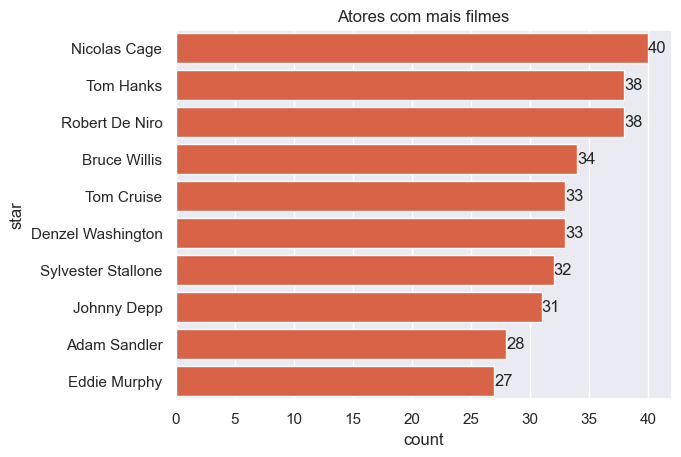

In [107]:
ax = sns.barplot(y=top_atores.index, x=top_atores, color='#F2542D')
ax.set_title('Atores com mais filmes')
for index, value in enumerate(top_atores):
    ax.text(value, index, f'{value}', va='center')

Text(0, 0.5, 'Gross')

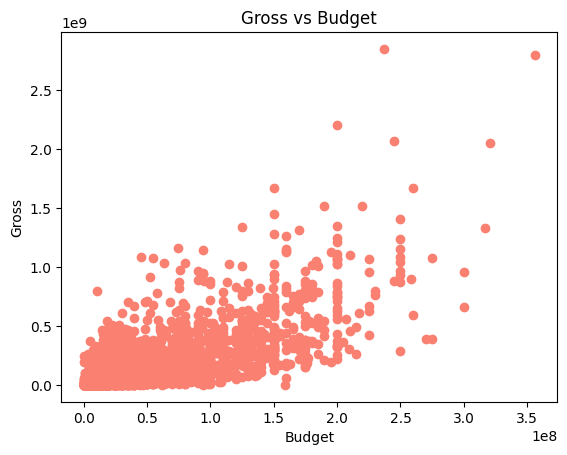

In [39]:
plt.scatter(x= dados['budget'], y = dados['gross'], c = 'salmon')
plt.title('Gross vs Budget')
plt.xlabel('Budget')
plt.ylabel('Gross')

Text(0.5, 1.0, 'Gross VS Budget')

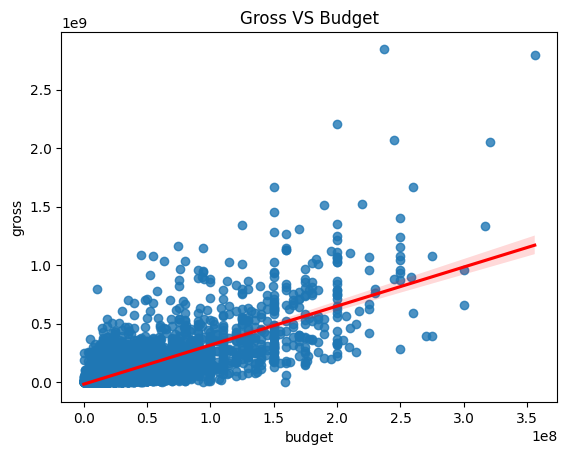

In [40]:
sns.regplot(data = dados, x = 'budget', y = 'gross', line_kws = {"color" : "red"}).set_title('Gross VS Budget')

In [41]:
dados.select_dtypes(include=[np.number]).corr()

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


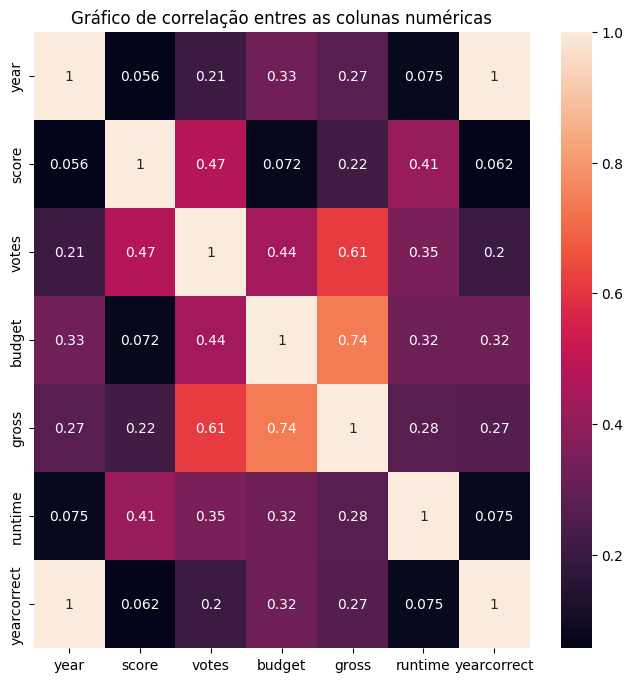

In [42]:
plt.figure(figsize = (8, 8))
sns.heatmap(dados.select_dtypes(include=[np.number]).corr(), annot = True).set_title('Gráfico de correlação entres as colunas numéricas')
plt.show()

In [43]:
dados_numerized = dados.copy()

for col in dados_numerized.columns:
    if(dados_numerized[col].dtype == 'object'):
        dados_numerized[col] = dados_numerized[col].astype('category')
        dados_numerized[col] = dados_numerized[col].cat.codes
dados_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0,2020
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0,2020
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0,2020
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0,2020


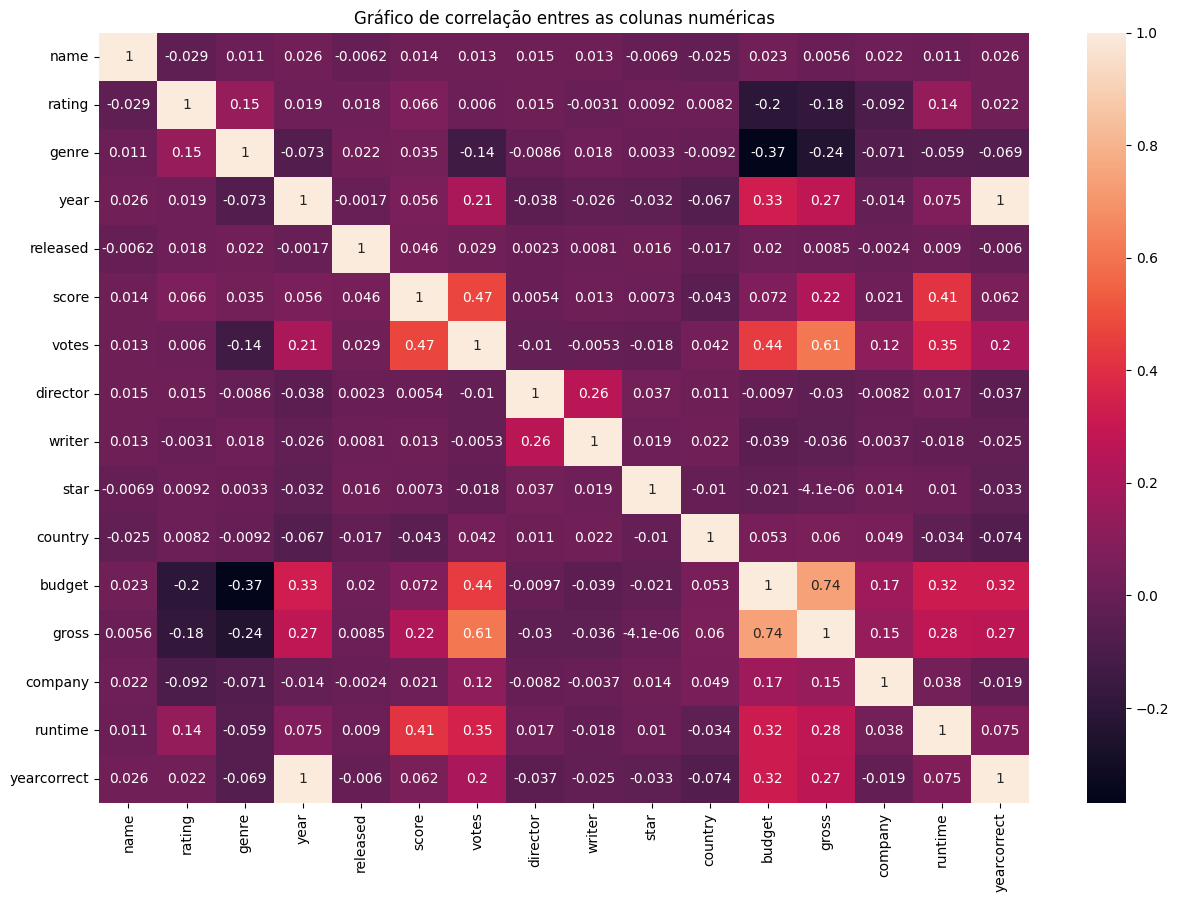

In [44]:
plt.figure(figsize = (15, 10))
sns.heatmap(dados_numerized.corr(), annot = True).set_title('Gráfico de correlação entres as colunas numéricas')
plt.show()